# Introdução

![](https://i.imgur.com/Stv7spo.jpg)

O Coronavírus, causador da pandemia global, pertence a uma família de vírus (CoV) que já circula no Brasil. Os vírus dessa família podem causar desde resfriados comuns a doenças mais graves, como a Síndrome Aguda Respiratória Severa (SARS) e a Síndrome Respiratória do Oriente Médio (MERS).

O Novo Coronavírus recebeu a denominação SARS-CoV-2 pela Organização Mundial da Saúde (OMS) e a doença que ele provoca tem a denominação COVID-19.

# Descrição do Modelo

Neste notebook será utilizado o algorítimo ARVORE ALEATÓRIA (Random forests _ou_ Random Decision Forests) para realizar um forecast (previsão) do numero de mortes ocorridas no Brasil, em destaque no Estado de São Paulo.

O processo realizado nesse notebook segue o seguinte roteiro:

1. Importação dos dados fornecidos pelo [Ministério da Saúde](https://covid.saude.gov.br/), e a nível municipal, pelo [Brasil.io](https://brasil.io/dataset/covid19/caso/);
2. Análise visual dos dados;
3. Tratamento dos dados e aplicação do algorítimo
4.
5.

# Notebook

### Importação de Bibliotecas

In [56]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from django.core.validators import URLValidator
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Tratamento e Visualização dos dados

### No Brasil


In [57]:
#Ultimos 10 dias  de morte no BRASIL!
original_df = pd.read_csv("cases-brazil-states-18-05-2020.csv");
df_br = original_df.filter(['date', 'state', 'deaths']);
df_br = df_br.loc[df_br['state'] == "TOTAL"];

print("Ultimos 10 dias de mortes no Brasil")
print(df_br.tail(10));
print("\n\nGráfico da curva de crescimento das mortes")

fig = px.bar(df_br, x="date", y="deaths", color="deaths", barmode="group")
fig.show()

Ultimos 10 dias de mortes no Brasil
            date  state  deaths
1637  2020-05-09  TOTAL   10697
1665  2020-05-10  TOTAL   11175
1693  2020-05-11  TOTAL   11659
1721  2020-05-12  TOTAL   12502
1749  2020-05-13  TOTAL   13280
1777  2020-05-14  TOTAL   14069
1805  2020-05-15  TOTAL   14982
1833  2020-05-16  TOTAL   15697
1861  2020-05-17  TOTAL   16199
1889  2020-05-18  TOTAL   16902


Gráfico da curva de crescimento das mortes


In [58]:
df = original_df.loc[original_df['date'] == "2020-05-18"];
df = df.loc[df['state'] != "TOTAL"];
df = df.loc[df['deaths'] > 100];
df = df.filter(['state', 'deaths']);
df = df.sort_values(by=['deaths'],ascending=False)

print("\n\nRelação de mortes por estados com mais de 100 mortes")
fig = px.bar(df, x="state", y="deaths", color="state", barmode="group", width=1000)
fig.show()



Relação de mortes por estados com mais de 100 mortes


O Estado de São Paulo concentra o maior número de óbitos ocorridos no Brasil, seguido pelo Rio de Janeiro, Ceara e Pernambuco.

### Comparação de crescimento entre os estados

In [59]:
#

Por meio destes gráficos podemos vizualisar as curvas de crescimento do numero de mortes de cada estado ao decorrer do tempo.

### No Estado de São Paulo

In [60]:
#Ultimos 10 dias  de morte no Estado DE SÃO PAULO!
df_sp = original_df.filter(['date', 'state', 'deaths']);
df_sp = df_sp.loc[df_sp['state'] == "SP"];

print("Ultimos 10 dias de Mortes no Estado de São Paulo")
print(df_sp.tail(10));

print("\n\nGráfico da curva de crescimento das mortes")

#foundNull = df_sp['deaths'].isnull().values.any(); #Nenhum valor nulo encontrado


fig = px.bar(df_sp, x="date", y="deaths", color="deaths", barmode="group")
fig.show()

Ultimos 10 dias de Mortes no Estado de São Paulo
            date state  deaths
1635  2020-05-09    SP    3608
1663  2020-05-10    SP    3709
1691  2020-05-11    SP    3743
1719  2020-05-12    SP    3949
1747  2020-05-13    SP    4118
1775  2020-05-14    SP    4315
1803  2020-05-15    SP    4501
1831  2020-05-16    SP    4688
1859  2020-05-17    SP    4782
1887  2020-05-18    SP    4823


Gráfico da curva de crescimento das mortes


O gráfico de mortes do Estado de São Paulo apresenta alguns picos de mortes em dias específicos, causando "saltos" no gráfico.

### Declarando classe auxiliadora

In [61]:
from myownapi.AnalyticsRandomForest import AnalyticsRandomForest;
analytics = AnalyticsRandomForest();

#NOTA: Classe ocultada pois estou no meu pc, ela fica em outra pasta!


# Aplicando FLORESTA ALEATÓRIA

O modelo ARVORE DE DECISÃO é aplicado utilizando a classe auxiliadora declarada acima.

## No Brasil

In [62]:
df.index
df_br_altered = df_br.copy().filter(['deaths']);
df_br_altered = df_br_altered.reset_index(drop=True)
df_br_altered['date'] = df_br_altered.index.copy();
df_br_altered["date"].tail(10)

print("Aplicando ARVORE DE DECISÃO para os dados nacionais")
analytics_br = AnalyticsRandomForest();
analytics_br.df = df_br_altered;
analytics_br.definirAtributosDePrecisao(['date'])
analytics_br.definirAtributoDesejado('deaths');
analytics_br.definirPorcentagemDeTeste(20);
analytics_br.aplicarArvoreDeDecisao();

Aplicando ARVORE DE DECISÃO para os dados nacionais
Atributos de precisão definidos para:
-->  date
Total de 1 atributos.
Definindo atributo desejado para: deaths
Porcentagem de Teste definido para: 20%
Porcentagem de Treino definido para: 80%
Iniciando Floresta aleatória!
Floresta aleatória aplicada com sucesso!


C:\Users\Petrus\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [63]:
dfCompar = analytics_br.compararPredicao();
dfCompar.tail(15)

,Atual,Predição
52,2173,1962
0,0,0
4,0,0
81,15697,14982
68,7077,6810
30,77,59
12,0,0
71,8597,9268
66,6439,5537
76,11659,11175


In [64]:
print ("Erro médio Absoluto: " + str(analytics_br.calcularErroMedioAbsoluto()));
print ("Erro médio Quadratico: " + str(analytics_br.calcularErroMedioQuadratico()));
print ("Raiz Quadradada do Erro Medio Quadratico: " + str(analytics_br.calcularRaizQuadradadaDoErroMedioQuadratico()));


Erro médio Absoluto: 311.6470588235294
Erro médio Quadratico: 191905.88235294117
Raiz Quadradada do Erro Medio Quadratico: 438.07063625965753


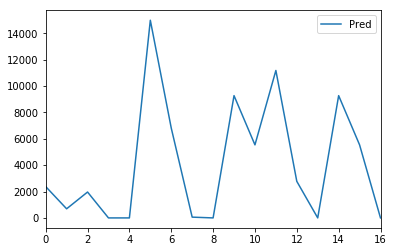

In [65]:
from pandas import DataFrame
Data = {'Pred': analytics_br.y_pred}
df_pred = DataFrame(Data,columns=['Pred'])
df_pred.plot()

A predição acima é esparçada, ele pega pontos aleatórios e vai prevendo entre si, por isso nao da para dar forecast nesses dados, estou tentando resolver isso.




Bom, ta no progresso, forecast com arvore de decisão é meio complicado, ainda estou lendo isso daqui para ver se consgio

https://www.statworx.com/de/blog/time-series-forecasting-with-random-forest/

